# 1. Load dataset

In [1]:
import pandas as pd
import seaborn as sns
pd.set_option("display.max.columns", None)
dataset = pd.read_csv("data.csv")

# 2. Clean the dataset
To clean the dataset we first have to check for the columns containing greater null values. **isnull()** with **sum()** is used to check whether the dataset contains the null values or not. This will return the number of null values in every column.

In [2]:
dataset.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

- To get the complete information of the data we can use **info()** method also.

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

### Dropping columns and rows with maximum number of null values
As we can see that the column **Loaned From** have the maximum number of null values and also we do not need that column for our analysis so we will drop it as follows:

In [4]:
dataset.drop(columns = 'Loaned From', inplace = True)

- After dropping the column we have somewhat cleaned the data. the info is given below.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

- Now lets remove the rows containing the null values.

In [6]:
dataset.dropna(inplace = True)

- After removing the null values completely we have cleaned the dataset. The information of refined dataset can be shown below:

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14743 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                14743 non-null  int64  
 1   ID                        14743 non-null  int64  
 2   Name                      14743 non-null  object 
 3   Age                       14743 non-null  int64  
 4   Photo                     14743 non-null  object 
 5   Nationality               14743 non-null  object 
 6   Flag                      14743 non-null  object 
 7   Overall                   14743 non-null  int64  
 8   Potential                 14743 non-null  int64  
 9   Club                      14743 non-null  object 
 10  Club Logo                 14743 non-null  object 
 11  Value                     14743 non-null  object 
 12  Wage                      14743 non-null  object 
 13  Special                   14743 non-null  int64  
 14  Prefer

# 3. Explore the dataset
- To get some insight of data i.e., display the names of players who have an overall more than 88 and potential more than 90.

In [8]:
new_dataset = dataset.loc[(dataset.Overall > 88) & (dataset.Potential > 90)]
new_dataset[['Name', 'Overall', 'Potential']]

,Name,Overall,Potential
0,L. Messi,94,94
1,Cristiano Ronaldo,94,94
2,Neymar Jr,92,93
4,K. De Bruyne,91,92
5,E. Hazard,91,91
6,L. Modrić,91,91
7,L. Suárez,91,91
8,Sergio Ramos,91,91
15,P. Dybala,89,94
16,H. Kane,89,91


# 4. Visualize the dataset
- To understand relationship between columns of FIFA dataset. Used plotting (catplot of seaborn package) to plot the number of players in the club(s) and the team position along with their counts.

### Graphical Visualization of number of players in clubs
- The graphical visualization of number of players in clubs is shown below:

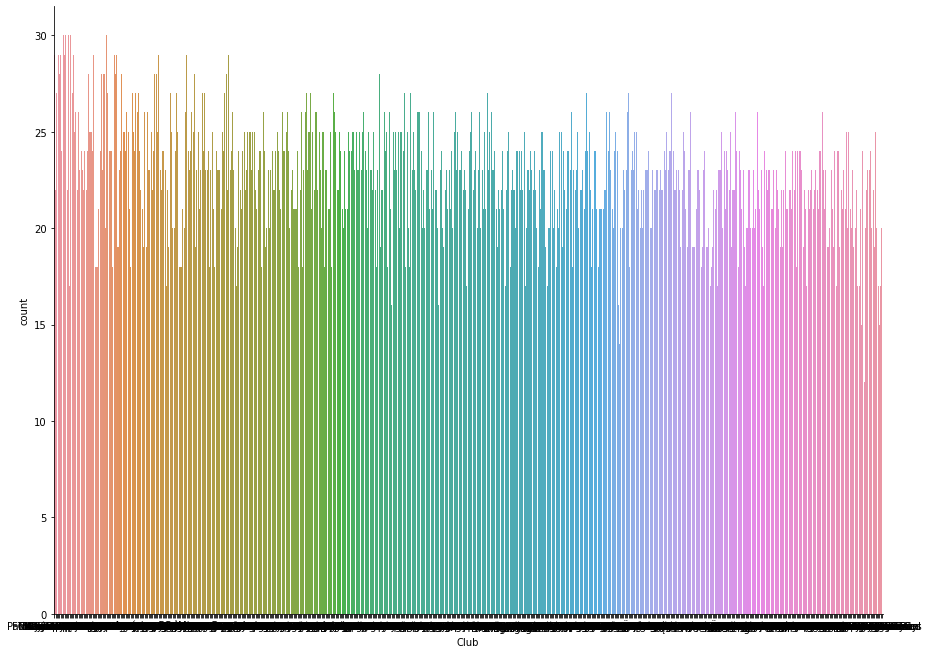

In [18]:
club = sns.catplot(x="Club", kind = 'count', data=dataset, height = 9, aspect = 13 / 9)

### Graphical visualization of team positions along with their counts
- The graphical visualization of team positions along with their counts is shown below:

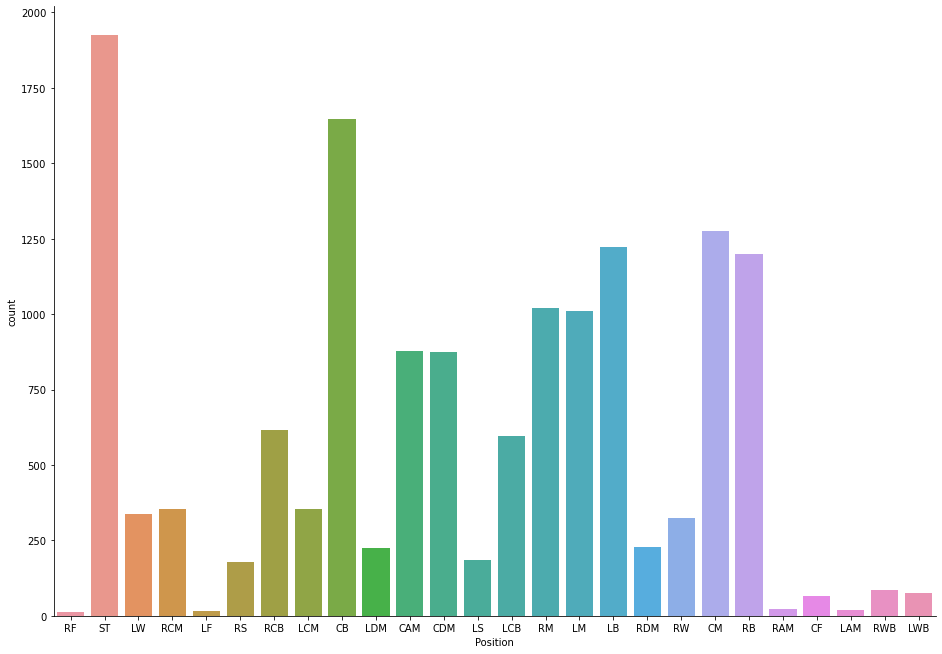

In [10]:
position = sns.catplot(x="Position", kind = 'count', data=dataset, height = 9, aspect = 13 / 9)

# 5. Find best player of LW position
- Find the best player for various team positions.

To find the best players for different positions we will group by the data set according to the positions and then we will check for the player with maximum overall score of that position.

In [15]:
ds = dataset.loc[dataset.groupby('Club')['Overall'].idxmax()]
ds

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
4587,4587,211920,M. Grüttner,32,https://cdn.sofifa.org/players/4/19/211920.png,Germany,https://cdn.sofifa.org/flags/21.png,71,71,SSV Jahn Regensburg,https://cdn.sofifa.org/teams/2/light/543.png,€1.9M,€9K,1740,Right,1.0,4.0,2.0,High/ High,Normal,No,RS,15.0,"Jul 1, 2016",2020,6'1,185lbs,70+2,70+2,70+2,63+2,66+2,66+2,66+2,63+2,63+2,63+2,63+2,62+2,57+2,57+2,57+2,62+2,51+2,50+2,50+2,50+2,51+2,50+2,51+2,51+2,51+2,50+2,42.0,74.0,72.0,62.0,68.0,62.0,50.0,31.0,33.0,68.0,64.0,66.0,67.0,67.0,67.0,73.0,82.0,88.0,83.0,62.0,76.0,22.0,74.0,54.0,63.0,66.0,41.0,35.0,31.0,15.0,16.0,11.0,10.0,11.0,€2.9M
2053,2053,211703,M. Schnatterer,32,https://cdn.sofifa.org/players/4/19/211703.png,Germany,https://cdn.sofifa.org/flags/21.png,75,75,1. FC Heidenheim 1846,https://cdn.sofifa.org/teams/2/light/111235.png,€5M,€14K,1892,Right,1.0,4.0,3.0,High/ Medium,Lean,No,LM,7.0,"Jul 1, 2008",2020,5'11,165lbs,68+2,68+2,68+2,73+2,72+2,72+2,72+2,73+2,73+2,73+2,73+2,73+2,70+2,70+2,70+2,73+2,60+2,57+2,57+2,57+2,60+2,56+2,45+2,45+2,45+2,56+2,82.0,73.0,29.0,75.0,64.0,70.0,82.0,83.0,75.0,74.0,73.0,76.0,78.0,69.0,71.0,80.0,62.0,75.0,64.0,82.0,47.0,47.0,70.0,72.0,84.0,75.0,30.0,36.0,33.0,9.0,7.0,7.0,6.0,7.0,€7.8M
5084,5084,216408,L. Spalvis,23,https://cdn.sofifa.org/players/4/19/216408.png,Lithuania,https://cdn.sofifa.org/flags/30.png,70,77,1. FC Kaiserslautern,https://cdn.sofifa.org/teams/2/light/29.png,€2.5M,€4K,1689,Left,1.0,4.0,3.0,High/ Medium,Lean,No,ST,33.0,"May 7, 2018",2022,6'2,172lbs,69+2,69+2,69+2,64+2,66+2,66+2,66+2,64+2,63+2,63+2,63+2,62+2,57+2,57+2,57+2,62+2,48+2,47+2,47+2,47+2,48+2,46+2,46+2,46+2,46+2,46+2,42.0,72.0,69.0,59.0,68.0,68.0,52.0,59.0,45.0,67.0,68.0,69.0,64.0,65.0,56.0,76.0,74.0,70.0,76.0,62.0,60.0,32.0,71.0,55.0,60.0,68.0,26.0,28.0,25.0,9.0,13.0,11.0,9.0,9.0,€4.2M
605,605,208334,J. Hector,28,https://cdn.sofifa.org/players/4/19/208334.png,Germany,https://cdn.sofifa.org/flags/21.png,79,79,1. FC Köln,https://cdn.sofifa.org/teams/2/light/31.png,€10M,€26K,2049,Left,3.0,3.0,3.0,Medium/ Medium,Normal,Yes,LWB,3.0,"Feb 25, 2012",2023,6'1,165lbs,68+3,68+3,68+3,72+3,70+3,70+3,70+3,72+3,72+3,72+3,72+3,74+3,74+3,74+3,74+3,74+3,78+3,77+3,77+3,77+3,78+3,78+3,76+3,76+3,76+3,78+3,79.0,55.0,71.0,78.0,51.0,74.0,65.0,65.0,74.0,77.0,75.0,77.0,67.0,80.0,67.0,69.0,66.0,82.0,76.0,61.0,71.0,81.0,62.0,72.0,65.0,78.0,76.0,79.0,79.0,9.0,10.0,10.0,12.0,14.0,€15M
5404,5404,193211,A. Ignjovski,27,https://cdn.sofifa.org/players/4/19/193211.png,Serbia,https://cdn.sofifa.org/flags/51.png,70,70,1. FC Magdeburg,https://cdn.sofifa.org/teams/2/light/110588.png,€1.5M,€8K,1821,Right,2.0,4.0,2.0,Medium/ Medium,Normal,No,RB,18.0,"Jul 1, 2018",2020,5'9,157lbs,57+2,57+2,57+2,61+2,60+2,60+2,60+2,61+2,61+2,61+2,61+2,62+2,62+2,62+2,62+2,62+2,68+2,67+2,67+2,67+2,68+2,68+2,68+2,68+2,68+2,68+2,61.0,41.0,51.0,67.0,48.0,65.0,64.0,58.0,56.0,67.0,73.0,67.0,77.0,70.0,80.0,64.0,72.0,64.0,59.0,55.0,78.0,71.0,49.0,53.0,48.0,68.0,69.0,73.0,75.0,7.0,15.0,8.0,10.0,6.0,€2.3M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [12]:
best_players = dataset.loc[dataset.groupby('Position')['Overall'].idxmax()]
best_players.reset_index()

,index,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,17,17,194765,A. Griezmann,27,https://cdn.sofifa.org/players/4/19/194765.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,€78M,€145K,2246,Left,4.0,3.0,4.0,High/ High,Lean,Yes,CAM,7.0,"Jul 28, 2014",2023,5'9,161lbs,86+3,86+3,86+3,87+3,87+3,87+3,87+3,87+3,86+3,86+3,86+3,86+3,80+3,80+3,80+3,86+3,70+3,67+3,67+3,67+3,70+3,67+3,61+3,61+3,61+3,67+3,82.0,90.0,84.0,83.0,87.0,88.0,84.0,78.0,76.0,90.0,88.0,85.0,90.0,90.0,80.0,80.0,90.0,83.0,62.0,82.0,69.0,35.0,91.0,83.0,79.0,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,€165.8M
1,12,12,182493,D. Godín,32,https://cdn.sofifa.org/players/4/19/182493.png,Uruguay,https://cdn.sofifa.org/flags/60.png,90,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,€44M,€125K,1946,Right,3.0,3.0,2.0,Medium/ High,Lean,Yes,CB,10.0,"Aug 4, 2010",2019,6'2,172lbs,64+3,64+3,64+3,61+3,62+3,62+3,62+3,61+3,62+3,62+3,62+3,63+3,68+3,68+3,68+3,63+3,76+3,81+3,81+3,81+3,76+3,79+3,87+3,87+3,87+3,79+3,55.0,42.0,92.0,79.0,47.0,53.0,49.0,51.0,70.0,76.0,68.0,68.0,58.0,85.0,54.0,67.0,91.0,66.0,88.0,43.0,89.0,88.0,48.0,52.0,50.0,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,€90.2M
2,20,20,189511,Sergio Busquets,29,https://cdn.sofifa.org/players/4/19/189511.png,Spain,https://cdn.sofifa.org/flags/45.png,89,89,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€51.5M,€315K,2065,Right,4.0,3.0,3.0,Medium/ Medium,Lean,Yes,CDM,5.0,"Sep 1, 2008",2023,6'2,168lbs,71+3,71+3,71+3,74+3,76+3,76+3,76+3,74+3,79+3,79+3,79+3,76+3,83+3,83+3,83+3,76+3,79+3,86+3,86+3,86+3,79+3,78+3,82+3,82+3,82+3,78+3,62.0,67.0,68.0,89.0,44.0,80.0,66.0,68.0,82.0,88.0,50.0,52.0,66.0,87.0,52.0,61.0,66.0,86.0,77.0,54.0,85.0,87.0,77.0,87.0,60.0,90.0,90.0,86.0,80.0,5.0,8.0,13.0,9.0,13.0,€105.6M
3,271,271,198706,Luis Alberto,25,https://cdn.sofifa.org/players/4/19/198706.png,Spain,https://cdn.sofifa.org/flags/45.png,82,85,Lazio,https://cdn.sofifa.org/teams/2/light/46.png,€28.5M,€67K,1941,Right,2.0,3.0,4.0,High/ Medium,Lean,Yes,CF,10.0,"Aug 31, 2016",2022,6'0,163lbs,77+2,77+2,77+2,82+2,82+2,82+2,82+2,82+2,84+2,84+2,84+2,82+2,79+2,79+2,79+2,82+2,60+2,59+2,59+2,59+2,60+2,54+2,44+2,44+2,44+2,54+2,76.0,80.0,49.0,88.0,76.0,86.0,86.0,81.0,87.0,88.0,77.0,72.0,79.0,83.0,74.0,77.0,54.0,73.0,67.0,77.0,29.0,28.0,81.0,87.0,56.0,72.0,44.0,25.0,18.0,6.0,8.0,6.0,12.0,11.0,€50.6M
4,67,67,189509,Thiago,27,https://cdn.sofifa.org/players/4/19/189509.png,Spain,https://cdn.sofifa.org/flags/45.png,86,86,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,€45.5M,€130K,2190,Right,3.0,3.0,5.0,Medium/ Medium,Normal,Yes,CM,19.0,"Jul 14, 2013",2021,5'9,154lbs,75+3,75+3,75+3,82+3,81+3,81+3,81+3,82+3,84+3,84+3,84+3,82+3,84+3,84+3,84+3,82+3,76+3,77+3,77+3,77+3,76+3,73+3,67+3,67+3,67+3,73+3,72.0,69.0,54.0,90.0,90.0,90.0,85.0,77.0,87.0,90.0,78.0,69.0,90.0,84.0,86.0,75.0,75.0,75.0,59.0,79.0,57.0,78.0,79.0,86.0,75.0,85.0,67.0,63.0,65.0,6.0,11.0,7.0,9.0,13.0,€75.1M
5,365,365,199434,D. Tadić,29,https://cdn.sofifa.org/players/4/19/199434.png,Serbia,https://cdn.sofifa.org/flags/51.png,81,81,Ajax,https://cdn.sofifa.org/teams/2/light/245.png,€17.5M,€26K,1972,Left,3.0,2.0,4.0,Medium/ Low,Normal,Yes,LAM,10.0,"Jul 3, 2018",2022,5'11,168lbs,73+3,73+3,73+3,79+3,77+3,77+3,77+3,79+3,79+3,79+3,79+3,79+3,75+3,75+3,75+3,79

- Here the **reset_index()** method is used to label the dataset with in ascending order.

# 6. Conclusion
- Display the data for the best team for the formation (4-3-3).
To do this task we first make the list of players type which are necessary for 4-3-3 formation. Then we will fetch the best players of each type by using **loc()**

In [13]:
team_formation = ['LB', 'CB', 'LCB', 'RCB', 'LCM', 'CDM', 'RCM', 'LW', 'RW', 'ST']
best_team = best_players.loc[best_players['Position'].isin(team_formation)]
best_team.reset_index()

,index,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,12,12,182493,D. Godín,32,https://cdn.sofifa.org/players/4/19/182493.png,Uruguay,https://cdn.sofifa.org/flags/60.png,90,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,€44M,€125K,1946,Right,3.0,3.0,2.0,Medium/ High,Lean,Yes,CB,10.0,"Aug 4, 2010",2019,6'2,172lbs,64+3,64+3,64+3,61+3,62+3,62+3,62+3,61+3,62+3,62+3,62+3,63+3,68+3,68+3,68+3,63+3,76+3,81+3,81+3,81+3,76+3,79+3,87+3,87+3,87+3,79+3,55.0,42.0,92.0,79.0,47.0,53.0,49.0,51.0,70.0,76.0,68.0,68.0,58.0,85.0,54.0,67.0,91.0,66.0,88.0,43.0,89.0,88.0,48.0,52.0,50.0,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,€90.2M
1,20,20,189511,Sergio Busquets,29,https://cdn.sofifa.org/players/4/19/189511.png,Spain,https://cdn.sofifa.org/flags/45.png,89,89,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€51.5M,€315K,2065,Right,4.0,3.0,3.0,Medium/ Medium,Lean,Yes,CDM,5.0,"Sep 1, 2008",2023,6'2,168lbs,71+3,71+3,71+3,74+3,76+3,76+3,76+3,74+3,79+3,79+3,79+3,76+3,83+3,83+3,83+3,76+3,79+3,86+3,86+3,86+3,79+3,78+3,82+3,82+3,82+3,78+3,62.0,67.0,68.0,89.0,44.0,80.0,66.0,68.0,82.0,88.0,50.0,52.0,66.0,87.0,52.0,61.0,66.0,86.0,77.0,54.0,85.0,87.0,77.0,87.0,60.0,90.0,90.0,86.0,80.0,5.0,8.0,13.0,9.0,13.0,€105.6M
2,35,35,176676,Marcelo,30,https://cdn.sofifa.org/players/4/19/176676.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,€43M,€285K,2279,Left,4.0,4.0,5.0,High/ Low,Normal,Yes,LB,12.0,"Jan 1, 2007",2022,5'9,176lbs,80+3,80+3,80+3,84+3,83+3,83+3,83+3,84+3,84+3,84+3,84+3,85+3,84+3,84+3,84+3,85+3,85+3,83+3,83+3,83+3,85+3,84+3,81+3,81+3,81+3,84+3,90.0,70.0,75.0,84.0,54.0,90.0,85.0,67.0,76.0,92.0,83.0,82.0,86.0,88.0,86.0,83.0,76.0,91.0,78.0,70.0,84.0,85.0,85.0,82.0,59.0,86.0,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0,€88.2M
3,24,24,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€27M,€215K,1841,Left,4.0,3.0,2.0,Medium/ High,Normal,Yes,LCB,3.0,"Jul 1, 2005",2020,6'2,187lbs,58+3,58+3,58+3,54+3,55+3,55+3,55+3,54+3,54+3,54+3,54+3,56+3,60+3,60+3,60+3,56+3,74+3,76+3,76+3,76+3,74+3,77+3,86+3,86+3,86+3,77+3,58.0,33.0,83.0,59.0,45.0,58.0,60.0,31.0,59.0,57.0,63.0,75.0,54.0,82.0,55.0,78.0,89.0,65.0,89.0,49.0,92.0,88.0,28.0,50.0,50.0,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,€44.6M
4,11,11,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,€76.5M,€355K,2190,Right,4.0,5.0,3.0,Medium/ Medium,Normal,Yes,LCM,8.0,"Jul 17, 2014",2022,6'0,168lbs,78+3,78+3,78+3,81+3,82+3,82+3,82+3,81+3,84+3,84+3,84+3,82+3,86+3,86+3,86+3,82+3,79+3,82+3,82+3,82+3,79+3,77+3,72+3,72+3,72+3,77+3,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M
5,2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88